
# Linear Regression Example
The example below uses a [marketing](https://scikit-learn.org/stable/datasets/toy_dataset.html) dataset,
in order to illustrate a linear regression activity.

Workflow:



1. Preparation
    1. Load the dataset from a `.csv` file and show a short description
    1. Show the two dimensional scatter plots for all the predicting variables with respect to the target
    1. Split the data into *predicting variables* `X` and *target* `y`
        1. here we set the `random_state` variable to make the experiment *repeatable* 
1. First experiment: compute the regression on a single predicting variable
    1. Consider a reduced dataset containing the chosen variable and the target
    1. Fit the `LinearRegression` estimator on the training set
    1. Show the statistical significance of the fitted model
    1. Predict the target for the test set using the *fitted* estimator
    1. Compute the regression coefficients and the quality measures: *Root Mean Squared Error (RMSE)* and *coefficient of determination (r2)*
1. Second experiment: compute the regression considering all the predicting variables
    1. Repeat the steps from 2.2 to 2.5
1. Third experiment: use the `DecisionTreeRegressor` with the entire dataset
    1. Fit the tree using the default hyperparameters, in order to find the 
    maximum depth of the unconstrained tree
    1. Use *cross-validation* to find the optimal *maximum depth* of the tree
    1. Fit the tree with the optmal `max_depth`
    1. Predict and show the *root mean squared error*
1. Fourth experiment: use the `RandomForestRegressor`
    1. Repeat steps from 4.2 to 4.4 (for simplicity, we use the maximum `max_depth` found in 4.1)


In [ ]:
# Code source: Claudio Sartori 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
import sklearn.metrics as metrics #from ... import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

random_state = 94922767 # this will be used to guarantee the repeatability of the experiment

In [ ]:
!pip install symbulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 KB 592.0 kB/s eta 0:00:00


## Load the dataset from a `.xlsx` file and show a short description

In [ ]:
# This cell allows full compatibility between execution in Google Colab and in local
try:
  # import google.colab.files
  from google.colab import files
  IN_COLAB = True
except:
  IN_COLAB = False
if IN_COLAB:
    uploaded = files.upload()

Saving FoodUK2014.xlsx to FoodUK2014.xlsx


In [ ]:
# The file must be available in the same directory, 
# or uploaded in the Colab environment 
# in the execution of the previous cell
data_fn = 'FoodUK2014.xlsx'
df0 = pd.read_excel(data_fn)

## Data Exploration and preparation

##### Show a short description of the columns

In [ ]:
df0.head()

,hhsize,quarter,adults_n,children_n,totalexp,SexHRP,month,Gorx,Year,income,AgeHRP,qmeat,qfish,qfv,xmeat,xfish,xfv,uvmeat,uvfish,uvfv
0,4,April to June,2,2,556.213795,Female,April,West Midlands,2014,985.655,34,13.745333,NaN,37.301331,96.156670,NaN,69.268333,6.995586,NaN,1.856993
1,4,July to September,2,2,737.685635,Male,August,North East,2014,824.520,38,6.045000,0.650000,30.203335,53.278336,6.500000,62.833336,8.813621,10.000000,2.080344
2,2,October to December,2,0,330.775000,Male,October,Northern Ireland,2014,271.925,54,11.780167,2.088667,17.032166,93.838333,28.491667,42.813335,7.965790,13.641079,2.513675
3,2,April to June,2,0,536.742283,Male,June,North West and Merseyside,2014,611.490,64,2.745167,NaN,4.008333,16.856667,NaN,5.416667,6.140490,NaN,1.351351
4,3,April to June,3,0,880.787157,Male,April,East Midlands,2014,496.040,64,12.857000,2.903333,7.345000,73.623337,16.921667,19.261665,5.726323,5.828358,2.622419


##### Show the number of rows with nulls

It is computed subtracting the number of rows in the dataset without nulls from the original number of rows

In [ ]:
df = df0.dropna()
print("Rows with nulls:", df0.shape[0] - df.shape[0])

Rows with nulls: 1668


#### Drop rows with nulls

In [ ]:
print("After dropping rows with nulls the dataset has", df.shape[0], "rows")

After dropping rows with nulls the dataset has 3446 rows


##### Data transormation
- Convert the alphanumeric SexHRP into numeric 0 and 1
    - the `sklearn` machine learning procedures work only with numeric predicting
      attributes
- Generate two new columns as ratio of other columns
    - this is suggested by background information

In [ ]:
rep = {'Female': 0, 'Male': 1}
df['SexHRP'] = df['SexHRP'].map(rep).fillna(df['SexHRP'])
df['qmeat_hhsize_ratio'] = df['qmeat'] / df['hhsize']
df['income_hhsize_ratio'] = df['income'] / df['hhsize']

#df = df.drop(columns=['quarter', 'totalexp', 'Year', 'hhsize', 'month', 'Gorx', 'income', 'qmeat', 'qfish', 'qfv', 'xmeat', 'xfish', 'xfv', 'uvfish', 'uvfv'])
df.head()

<ipython-input-9-6603987b4997>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SexHRP'] = df['SexHRP'].map(rep).fillna(df['SexHRP'])
<ipython-input-9-6603987b4997>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['qmeat_hhsize_ratio'] = df['qmeat'] / df['hhsize']
<ipython-input-9-6603987b4997>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,hhsize,quarter,adults_n,children_n,totalexp,SexHRP,month,Gorx,Year,income,...,qfish,qfv,xmeat,xfish,xfv,uvmeat,uvfish,uvfv,qmeat_hhsize_ratio,income_hhsize_ratio
1,4,July to September,2,2,737.685635,1,August,North East,2014,824.520,...,0.650000,30.203335,53.278336,6.500000,62.833336,8.813621,10.000000,2.080344,1.511250,206.130000
2,2,October to December,2,0,330.775000,1,October,Northern Ireland,2014,271.925,...,2.088667,17.032166,93.838333,28.491667,42.813335,7.965790,13.641079,2.513675,5.890083,135.962500
4,3,April to June,3,0,880.787157,1,April,East Midlands,2014,496.040,...,2.903333,7.345000,73.623337,16.921667,19.261665,5.726323,5.828358,2.622419,4.285667,165.346667
5,4,January to March,2,2,372.275578,1,February,Wales,2014,266.530,...,1.789667,27.378000,303.181671,28.773333,86.558327,8.451528,16.077482,3.161602,8.968250,66.632500
7,3,January to March,3,0,151.750522,1,January,Eastern,2014,403.180,...,3.003000,6.742667,72.258331,26.000000,17.376667,5.904745,8.658009,2.577121,4.079111,134.393333


##### Use only the columns that the experts consider interesting
This is suggested by background information

In [ ]:
df = df.drop(columns=['quarter', 'totalexp', 'Year', 'hhsize', 'month', 'Gorx', 'income', 'qmeat', 'qfish', 'qfv', 'xmeat', 'xfish', 'xfv', 'uvfish', 'uvfv'])
df.head()

,adults_n,children_n,SexHRP,AgeHRP,uvmeat,qmeat_hhsize_ratio,income_hhsize_ratio
1,2,2,1,38,8.813621,1.511250,206.130000
2,2,0,1,54,7.965790,5.890083,135.962500
4,3,0,1,64,5.726323,4.285667,165.346667
5,2,2,1,70,8.451528,8.968250,66.632500
7,3,0,1,64,5.904745,4.079111,134.393333


## Choose the target and split the data into *predicting variables* `X` and *target* `y`

In [ ]:
target_name = 'qmeat_hhsize_ratio'
X = df.drop(columns=[target_name])
y = df[target_name]

## Show the two dimensional scatter plots for all the predicting variables with respect to the target

In [ ]:
ncols=3
import math
nrows = math.ceil((df.shape[1]-1)/ncols)
figwidth = ncols * 7
figheigth = nrows*5

['adults_n', 'children_n', 'SexHRP', 'AgeHRP', 'uvmeat', 'income_hhsize_ratio']


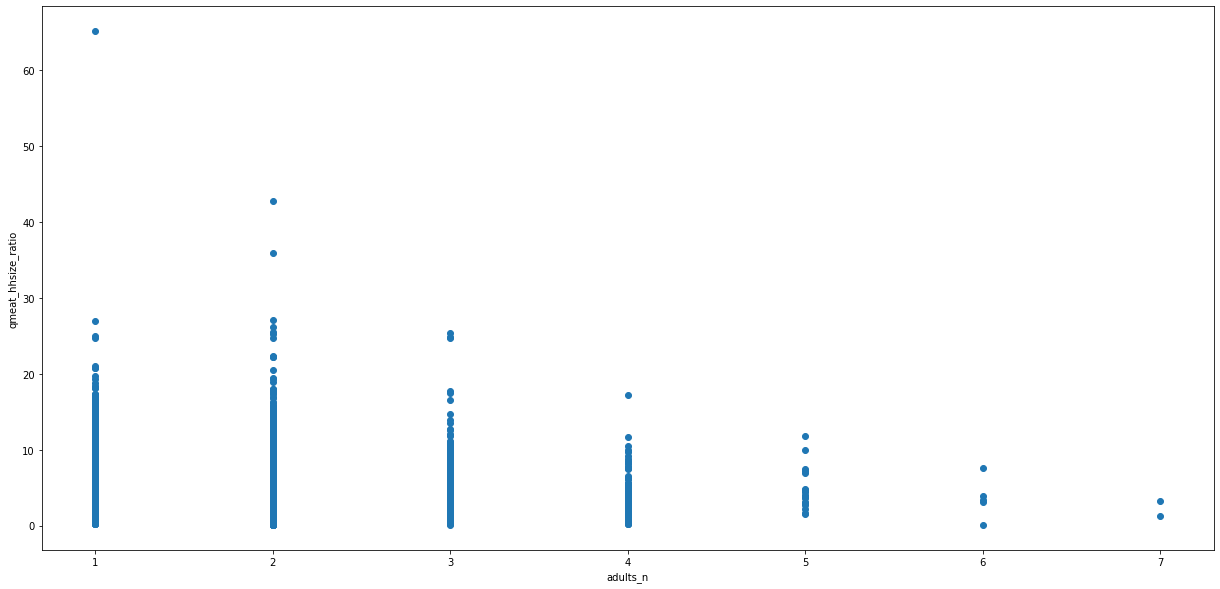

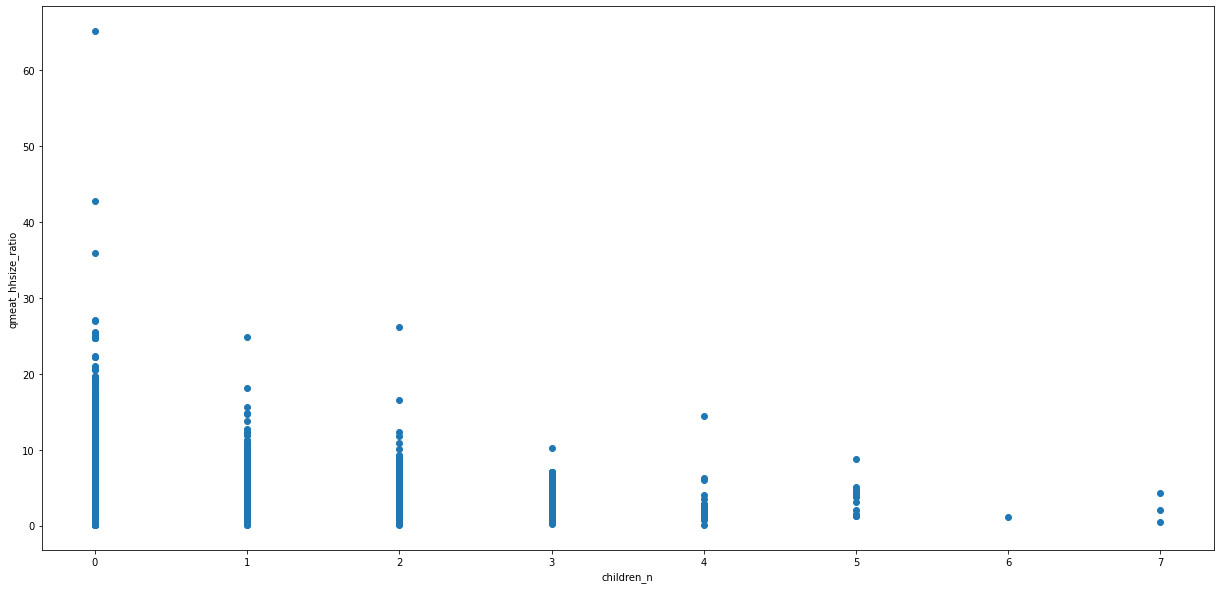

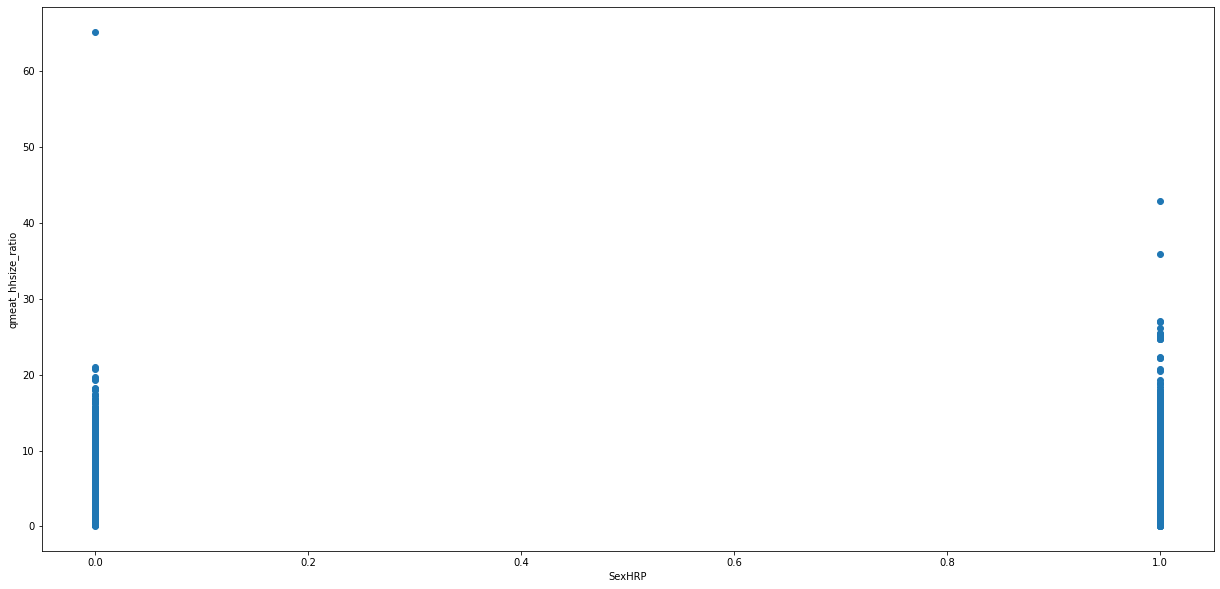

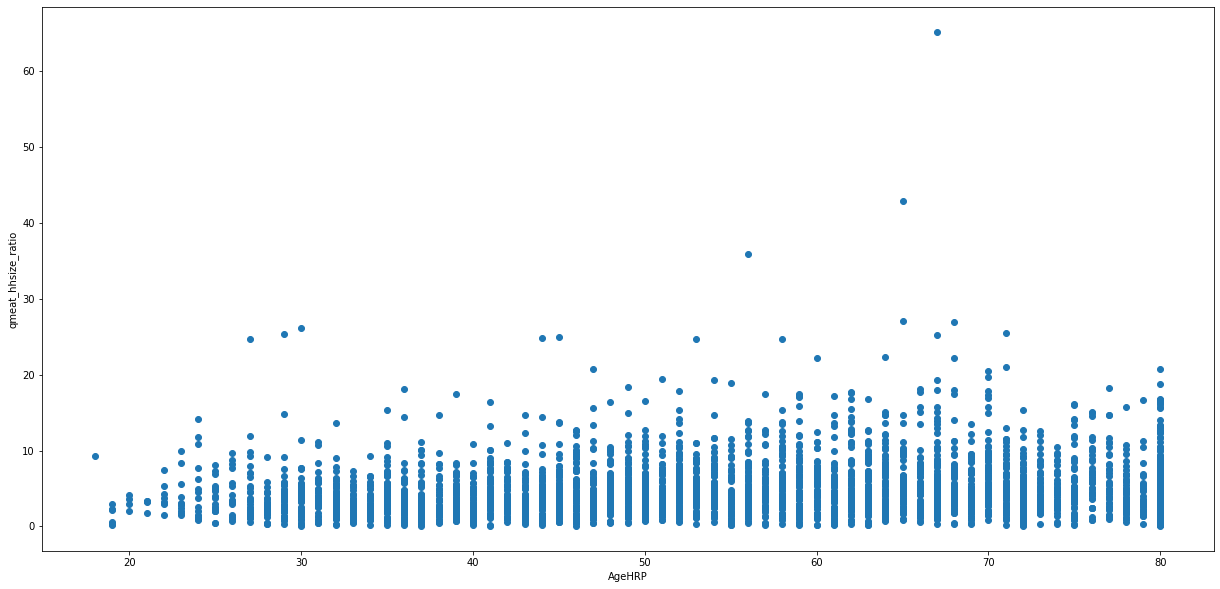

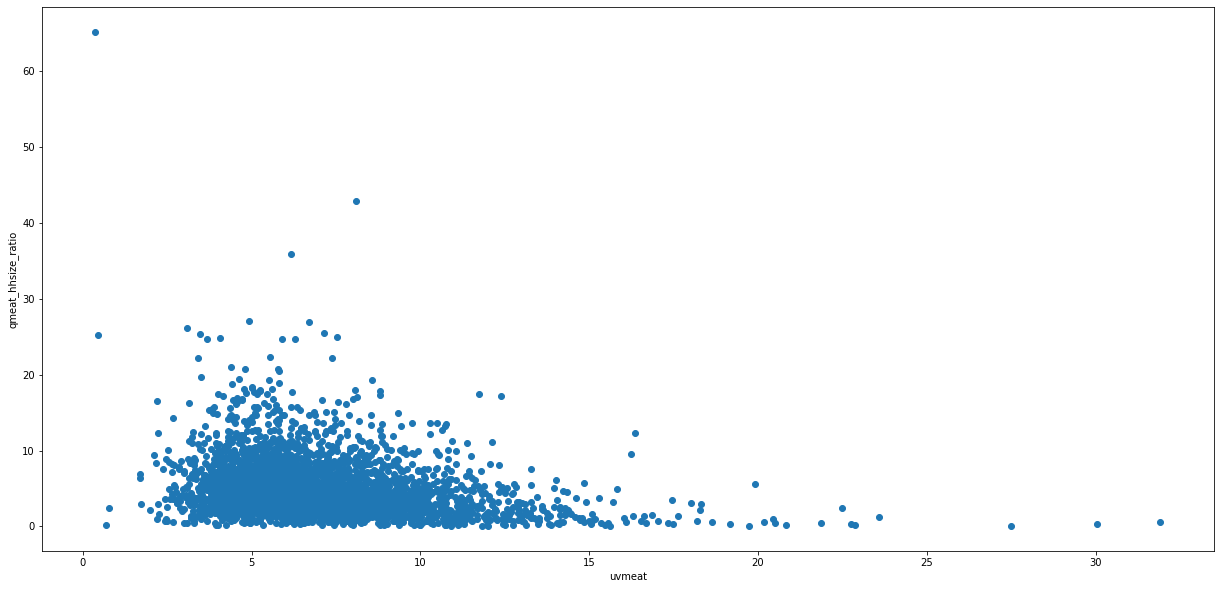

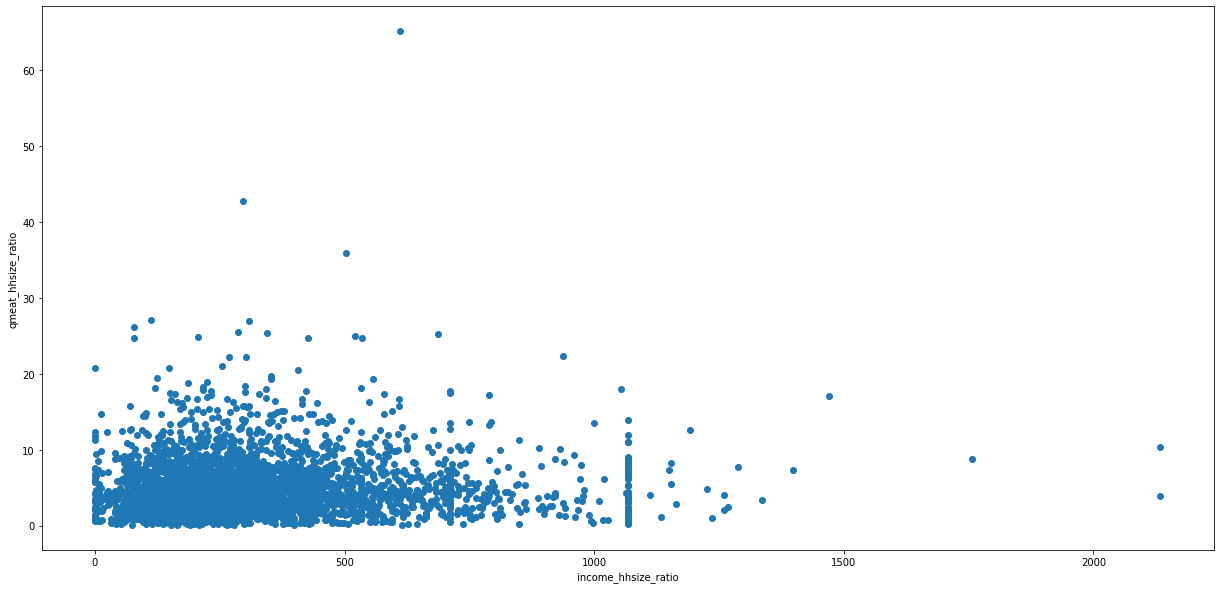

In [ ]:
print(X.columns.values.tolist())
for lab in X.columns:
  fig, ax = plt.subplots(figsize=(figwidth, figheigth))
  ax.scatter(x=X[lab], y=y)
  ax.set_ylabel('qmeat_hhsize_ratio', fontsize=10)
  ax.set_xlabel(lab, fontsize=10)
    
  plt.show()

### Show the *_p-values_* of the target with respect to the variables

In [ ]:
from sklearn.feature_selection import f_regression
scores, pvalues = f_regression(X, y)
# P-value tells, for each predictor variable, the statistical significance of its relationship with the target variable
pval = {'Variable': X.columns.values, 'p-value': pvalues}
pdf = pd.DataFrame(pval)
print(pdf)
# ==> By observing the p-value of each of the variables, we can conclude that the most significant in this regression model is 'SexHRP'

              Variable       p-value
0             adults_n  1.415945e-05
1           children_n  1.077386e-30
2               SexHRP  8.429827e-02
3               AgeHRP  1.710126e-21
4               uvmeat  4.789746e-52
5  income_hhsize_ratio  1.211099e-03


## Split the data into *train* and *test* and show the sizes of the two parts
Here we set the `random_state` variable to make the experiment *repeatable*


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state)
print('The train set has', len(ytrain), 'samples\nThe test set has', len(ytest), 'samples\nEach sample has', X.shape[1], 'features')

The train set has 2584 samples
The test set has 862 samples
Each sample has 6 features


### Consider a reduced dataset containing the chosen variable and the target

In [ ]:
# Choosing adults_n as single predicting variable, dropping all other columns
Xtrain_red = Xtrain.drop(columns=["children_n", "SexHRP", "AgeHRP", "uvmeat", "income_hhsize_ratio"])
Xtest_red = Xtest.drop(columns=["children_n", "SexHRP", "AgeHRP", "uvmeat", "income_hhsize_ratio"])

### Fit the `linear_model` estimator on the training set and predict the target for the test set using the *fitted* estimator

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(Xtrain_red, ytrain)
ypred = model.predict(Xtest_red)
print(ypred)

[5.35521422 4.99459466 4.99459466 4.99459466 4.6339751  4.99459466
 4.6339751  4.6339751  4.99459466 4.99459466 4.99459466 4.99459466
 5.35521422 4.99459466 4.99459466 4.99459466 4.99459466 4.99459466
 4.99459466 4.99459466 4.6339751  4.27335554 4.99459466 4.99459466
 4.99459466 5.35521422 4.99459466 4.99459466 5.35521422 4.99459466
 4.99459466 4.99459466 4.99459466 5.35521422 4.99459466 4.6339751
 4.99459466 4.6339751  4.99459466 4.99459466 4.6339751  4.99459466
 4.99459466 4.99459466 5.35521422 4.99459466 4.6339751  5.35521422
 4.99459466 4.99459466 5.35521422 4.99459466 4.99459466 4.99459466
 4.99459466 4.27335554 5.35521422 4.99459466 4.99459466 5.35521422
 4.27335554 4.99459466 5.35521422 4.99459466 4.99459466 5.35521422
 4.6339751  4.99459466 5.35521422 4.27335554 5.35521422 4.99459466
 4.6339751  4.99459466 4.99459466 4.99459466 4.99459466 4.99459466
 5.35521422 5.35521422 5.35521422 5.35521422 4.99459466 4.99459466
 4.6339751  5.35521422 4.6339751  5.35521422 5.35521422 4.99459

#### Compute the regression coefficients and the quality measures
Create a function to compute the F-statistic and p-value of the regression model

In [ ]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm

# Sources: 
# - https://stackoverflow.com/a/57239611
# - https://stats.stackexchange.com/questions/56881/whats-the-relationship-between-r2-and-f-test
# - https://www.statology.org/f-test-python/

# First link contains additional quality measures

import sklearn.metrics as metrics

def regression_results(x_test, y_true, y_pred):

    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    # mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    dfn = x_test.shape[1]       # DOF Numerator = K;           where: K = num of predictors (i.e., num of independent variables)
    dfd = len(y_true) - (dfn+1) # DOF Denominator = N - (K+1); where: N = num of samples; K = num of predictors
    
    #fstat = np.var(x_test, ddof=1)/np.var(y_true, ddof=1)
    fstat = (r2/(1-r2))*(dfd/dfn)
    p_val = 1 - scipy.stats.f.cdf(fstat, dfn, dfd) # 1 - sm.F(K - 1, N - K).cdf(fstat)

    print('RMSE: ', round(np.sqrt(mse),4))
    print('r2: ', round(r2,4))
    print('F-statistic: ', round(fstat, 4))
    print('p-value: ', p_val)#round(p_val,4)) # to avoid rounding very small p-values to 0.0
    

#### Compute the statistical significance of the model

## Second experiment: compute the regression considering all the predicting variables

### Now we use the entire data in `X_train` and `X_test` for fitting and predicting

In [ ]:
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(ytest, ypred)

1931    1.733333
1145    4.362584
4373    9.279833
1504    3.844208
4477    5.164250
          ...   
4292    3.379458
3546    4.788333
4526    2.426667
3260    4.028267
2433    3.636750
Name: qmeat_hhsize_ratio, Length: 862, dtype: float64 [ 4.07582987  4.38374926  4.40394779  2.0328937   4.91606494  5.19220123
  6.09455977  3.54295008  6.99043977  4.41871196  4.01375088  5.12077838
  4.30157896  2.99663346  5.69804547  6.23172298  3.15216911  5.43216405
  3.31107733  1.63427718  4.75649679  4.38237496  5.80932233  6.65217586
  6.16817666  5.11122416  6.58192796  3.56705543  5.67765782  6.31000489
  6.30152184  4.54839732  3.94048348  5.41172937  6.00919922  3.60144066
  4.79569871  4.15286463  4.6219807   6.19773117  4.65437128  6.04505406
  2.27973791  3.74455517  6.47476135  4.10487105  3.93404473  5.45398639
  5.80366046  3.61998893  5.62190505  4.7942411  -0.35877623  4.31379734
  6.06165651  5.86677195  8.52108905  4.00326704  5.49417761  6.04316528
  5.03244785  5.66153515  6.3

### Fit, predict and show the results
Now we see the *regression coefficients* resulting from the fitting. 

In particular, *positive coefficients* indicate that the target *increases* with the variable, *negative coefficients* indicate a *decreasing* trend.

The absolute values of the coefficient cannot be considered directly a measure of importance, due to the possibly different orders of magnitude of the data in the different columns (observe above the outputs of `describe`).

In [ ]:
# from https://www.statology.org/sklearn-regression-coefficients/
pd.DataFrame(zip(X.columns, model.coef_))

,0,1
0,adults_n,-0.340699
1,children_n,-0.642617
2,SexHRP,0.326706
3,AgeHRP,0.016193
4,uvmeat,-0.385138
5,income_hhsize_ratio,0.000969


#### Compute the statistical significance

,Variable,p-value
0,adults_n,4.812836e-19
1,children_n,1.384315e-188
2,SexHRP,5.806116e-10
3,AgeHRP,3.199609e-119
4,income_hhsize_ratio,6.460728e-08
5,uvmeat,0.000000e+00


#### Compute the quality measures

In [ ]:
regression_results(Xtest, ytest, ypred)

RMSE:  3.7531
r2:  0.1204
F-statistic:  19.4975
p-value:  1.1102230246251565e-16


## Decision Tree Multivariate Regresson

In [ ]:
# Create Decision Tree regression object
from sklearn.tree import DecisionTreeRegressor

#### Fit the tree with default hyperparameters, and find the maximum depth of the unconstrained tree

In [ ]:
model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)
fitted_max_depth = model.get_depth()
print(fitted_max_depth)

33


#### Find the optimal value of the hyperparameter `max_depth` with *cross-validation*
The optimization searches for the *maximum tree depth* guaranteing the smallest mean squared error
At the end, this operation returns also the *fitted best tree* `best_estimator_`

#### My comment
We use the same method as shown in lab03-02 (topic 3b - class_tuning). We initialize an empty score vector in which to store the scores of each depth utilized, ranging depths from 1 to the maximum depth found.

In [ ]:
from sklearn.model_selection import cross_val_score


parameter_values = range(1, fitted_max_depth+1)
scores = []
for par in parameter_values:
  estimator = DecisionTreeRegressor(max_depth=par, criterion="squared_error")
  cross_scores = cross_val_score(estimator, Xtrain, ytrain, scoring='neg_mean_squared_error')
  scores.append(np.average(cross_scores))

rmse_scores = np.sqrt(np.negative(scores))
best_depth = np.argmin(rmse_scores)

print('The optimal maximum depth for the decision tree is', best_depth)

The optimal maximum depth for the decision tree is 1


In [ ]:
print('Decision Tree Regression - RMSE =', round(rmse_scores[best_depth], 2))
model = DecisionTreeRegressor(max_depth=best_depth)
model.fit(Xtrain, ytrain)

Decision Tree Regression - RMSE = 3.59


#### Show the tree

[Text(0.5, 0.8333333333333334, 'uvmeat <= 7.393\nsquared_error = 14.113\nsamples = 2584\nvalue = 5.018'),
 Text(0.25, 0.5, 'children_n <= 0.5\nsquared_error = 15.005\nsamples = 1615\nvalue = 5.653'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'uvmeat <= 12.428\nsquared_error = 10.836\nsamples = 969\nvalue = 3.96'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

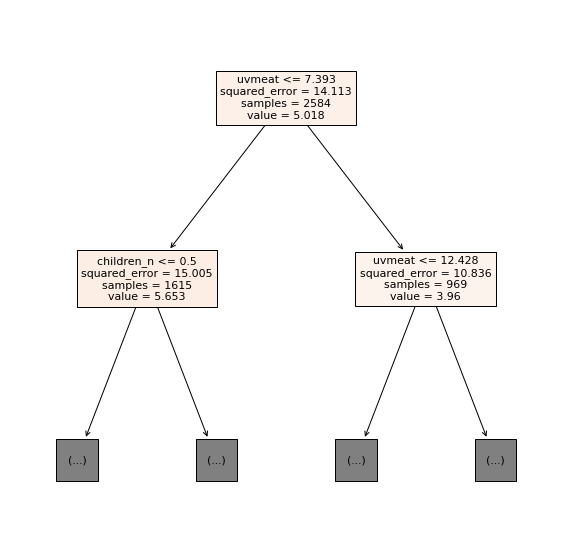

In [ ]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
# Your code here
fig, ax = plt.subplots(figsize=(10,10))
plot_tree(model, max_depth=best_depth, feature_names=Xtest.columns, class_names=[target_name], filled=True)

## Random Forest Multivariate Regresson
Create a Random forest regressor and fit it on the complete dataset.

For simplicity use the max_depth found in the Decision tree regressor to perform a cross validation and find the best depth for this model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

scores = []
for par in parameter_values:
  estimator = RandomForestRegressor(max_depth=par, criterion="squared_error")
  cross_scores = cross_val_score(estimator, Xtrain, ytrain, scoring='neg_mean_squared_error')
  scores.append(np.average(cross_scores))

rmse_scores = np.sqrt(np.negative(scores))
best_depth = np.argmin(rmse_scores)

print('The optimal maximum depth for the trees in the random forest is', best_depth)

The optimal maximum depth for the trees in the random forest is 2


In [ ]:
print('Random Forest Regression - RMSE =', round(rmse_scores[best_depth], 2))
model = RandomForestRegressor(max_depth=best_depth)
model.fit(Xtrain, ytrain)

Random Forest Regression - RMSE = 3.55


RandomForestRegressor(max_depth=2)

## Final observations
### Linear regression
The multivariate regression with all the predicting variables available with respect to the univariate regression has 
- lower RMSE 
- higher coefficient of determination 
- the p-value suggests the acceptance of both models
### Decision Tree and Random Forest regression
- Decistion Tree has an RMSE slightly higher than multivariate linear regression
- Random Forest has an RMSE slightly lower than multivariate linear regression


## Control questions
1. observing the multi-variate experiment, what variable has the higher effect on the target?
1. is there a variable having an almost negligible effect on the target?
1. try to repeat the univariate experiment with the other two columns and comment the results